In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

TARGET_DIR = "./wirawit/lstm150/"

true_path = lambda item: os.path.join(TARGET_DIR, item)

In [32]:
config = None
with open(true_path('config.json')) as f:
    config = json.load(f)
    
test_loss = np.load(true_path('test_loss.npy'))[0]
epoch_losses = np.load(true_path('epoch_losses.npy'))
v_train_losses = np.load(true_path('v_interval_train_losses.npy'))
v_val_losses = np.load(true_path('v_interval_val_losses.npy'))

### Config

In [33]:
df = pd.DataFrame.from_dict(config, orient='index')
df.reset_index(level=0, inplace=True)
df

,index,0
0,model,"BasicLSTM(\n (lstm): LSTM(93, 150, batch_firs..."
1,criterion,CrossEntropyLoss()
2,optimizer,SGD (\nParameter Group 0\n dampening: 0\n ...
3,path_to_save_result,./
4,session_name,lstm150
5,n_epochs,200
6,print_every_n_epochs,5
7,validate_every_v_epochs,5
8,verbose,True
9,num_epochs_no_improvement_early_stop,3


### Test Loss

In [34]:
print('Test loss is', test_loss)

Test loss is 1.8923634384343893


### Plot Train vs Val loss

It's recorded every `v_interval`:

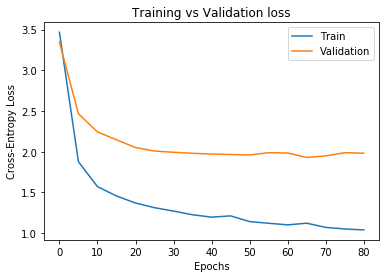

In [35]:
v_interval = config['validate_every_v_epochs']
xrange = np.arange(0, len(v_train_losses) * v_interval, v_interval)

plt.plot(xrange, v_train_losses, label='Train')
plt.plot(xrange, v_val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training vs Validation loss')
plt.legend(loc='best')
plt.show()

### Plot all epochs loss

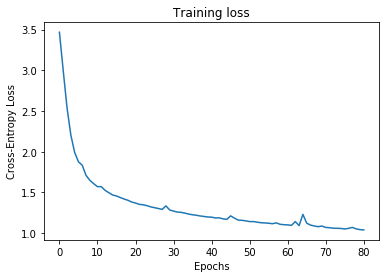

In [30]:
plt.plot(epoch_losses)
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training loss')
plt.show()